In [1]:
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#####

date=[2010,9,1,0]

year=date[0]
month=date[1]
day=date[2]
hour=date[3]

hour0 = ( hour//6 )*6
ihe = hour - hour0

print( year,month,day,hour0 , ihe)

2010 9 1 0 0


In [3]:
#-------------------------------------
#  Make ERA5 nmaes/paths
#-------------------------------------

monStr=str( year ).zfill(4)+str(month).zfill(2)
# CAM history style yyyy-mm-dd string
ymdStr=str( year ).zfill(4) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2)

hour1=hour0+5
ymdh0=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour0).zfill(2)
ymdh1=str( year ).zfill(4)+str(month).zfill(2)+str(day).zfill(2)+str(hour1).zfill(2)
ymdh=ymdh0+'_'+ymdh1
    
print( "Time tags for ERA5 files ...")
print(monStr)
print(ymdh) 

era5dir = "/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/"
wrkdir=era5dir+monStr+"/"

#Define all file names for later use in dask function
#-----------------------------------------------------
spfile= wrkdir + 'e5.oper.an.ml.128_134_sp.regn320sc.'+ymdh+'.nc'
tfile = wrkdir + 'e5.oper.an.ml.0_5_0_0_0_t.regn320sc.'+ymdh+'.nc'
qfile = wrkdir + 'e5.oper.an.ml.0_5_0_1_0_q.regn320sc.'+ymdh+'.nc'
ufile = wrkdir + 'e5.oper.an.ml.0_5_0_2_2_u.regn320uv.'+ymdh+'.nc'
vfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_3_v.regn320uv.'+ymdh+'.nc'
wfile = wrkdir + 'e5.oper.an.ml.0_5_0_2_8_w.regn320sc.'+ymdh+'.nc'
all_ERA_files = [ spfile , tfile, qfile, ufile, vfile, wfile ]
print( all_ERA_files )

Time tags for ERA5 files ...
201009
2010090100_2010090105
['/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.128_134_sp.regn320sc.2010090100_2010090105.nc', '/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.0_5_0_0_0_t.regn320sc.2010090100_2010090105.nc', '/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.0_5_0_1_0_q.regn320sc.2010090100_2010090105.nc', '/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.0_5_0_2_2_u.regn320uv.2010090100_2010090105.nc', '/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.0_5_0_2_3_v.regn320uv.2010090100_2010090105.nc', '/glade/campaign/collections/rda/data/ds633.6/e5.oper.an.ml/201009/e5.oper.an.ml.0_5_0_2_8_w.regn320sc.2010090100_2010090105.nc']


In [4]:
#-------------------------------------
#  Make paths to regridded CAM files
#-------------------------------------
MySrc="ERA5"
MyDst="ne120pg3"
MyDstVgrid="L93"

SuperDir = "/glade/campaign/cgd/amp/juliob/ERA5"
version="Test01"
Bdiro=f"{SuperDir}/{MyDst}/{MyDstVgrid}"
Bfilo= Bdiro + "/" + MySrc +"_x_"+ MyDst + "_"+ MyDstVgrid + "_" + version 
Bfilo = Bfilo + '_WO'

# CAM history style yyyy-mm-dd-ss string
yymmdd =str( year ).zfill(4) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2)
ss = str(int(hour)*3600).zfill(5)
timetag =  yymmdd+'-'+ss
filo= Bfilo + "." + timetag+ ".nc"
print( filo )


/glade/campaign/cgd/amp/juliob/ERA5/ne120pg3/L93/ERA5_x_ne120pg3_L93_Test01_WO.2010-09-01-00000.nc


In [5]:
#-------------------------------------
#  Make paths to regridded CAM files
#-------------------------------------
MySrc="ERA5"
MyDst="ne120np4"
MyDstVgrid="L93"

SuperDir = "/glade/campaign/cgd/amp/juliob/ERA5"
version="rgC2"
Bdiro2=f"{SuperDir}/{MyDst}/{MyDstVgrid}"
Bfilo2= Bdiro2 + "/" + MySrc +"_x_"+ MyDst + "_"+ MyDstVgrid + "_" + version 
Bfilo2 = Bfilo2 + '_WO'

# CAM history style yyyy-mm-dd-ss string
yymmdd =str( year ).zfill(4) + '-' + str(month).zfill(2) + '-' + str(day).zfill(2)
ss = str(int(hour)*3600).zfill(5)
timetag =  yymmdd+'-'+ss
filo2= Bfilo2 + "." + timetag+ ".nc"
print( filo2 )


/glade/campaign/cgd/amp/juliob/ERA5/ne120np4/L93/ERA5_x_ne120np4_L93_rgC2_WO.2010-09-01-00000.nc


In [6]:
XC=xr.open_dataset( filo )

In [7]:
XC2=xr.open_dataset( filo2 )

In [8]:
XEu = xr.open_dataset( ufile )

In [ ]:
XEu

In [9]:
Epres = XEu.a_model+100000.*XEu.b_model
Cpres = XC.lev

In [ ]:
plt.plot(Cpres)

In [10]:
####
Epix = np.abs( Epres - 50_000. ).argmin()
Cpix = np.abs( Cpres - 500. ).argmin()
print( Cpres[Cpix].values, Epres[Epix].values)



498.51109675504534 50325.166406000004


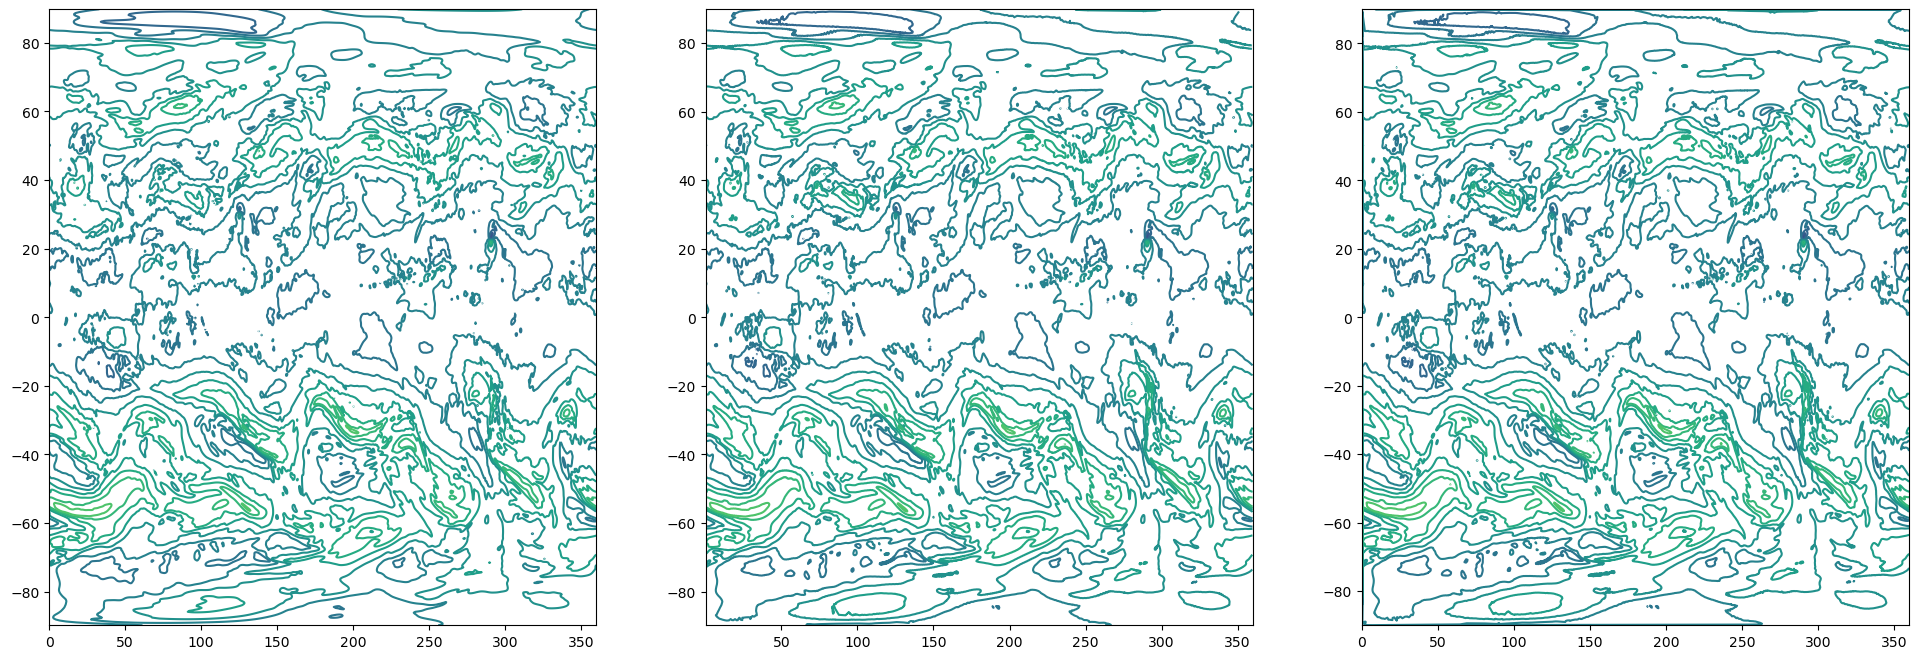

In [14]:
fig,ax=plt.subplots(1,3,squeeze=False,figsize=(24,8))
ulevs=np.linspace(-80,100,num=19)
ax[0,0].contour( XEu.longitude, XEu.latitude, XEu.U[ihe,Epix,:,:] ,levels=ulevs )
#ax[0,0].set_xlim( (50,150) )
#ax[0,0].set_ylim( (0,60) )

ax[0,1].tricontour( XC.lon, XC.lat, XC.U[0,Cpix,:] ,levels=ulevs )
#ax[0,1].set_xlim( (50,150) )
#ax[0,1].set_ylim( (0,60) )


ax[0,2].tricontour( XC2.lon, XC2.lat, XC2.U[0,Cpix,:] ,levels=ulevs )
#ax[0,2].set_xlim( (50,150) )
#ax[0,2].set_ylim( (0,60) )